In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
viol_data = "license_viol_count.csv"
violation_data = pd.read_csv(viol_data)
violation_data.head()

,license_,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v62,v63,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance
0,0,2,5,13,0,18,0,0,0,0,...,0,0,135,30,24,16,9,11,40,0
1,9,1,1,1,0,1,0,0,0,0,...,0,0,16,4,4,2,0,0,4,0
2,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,149,0,0,1,0,2,0,0,0,0,...,0,0,23,5,5,1,1,5,4,0
4,164,0,1,0,0,0,0,0,0,0,...,0,0,11,3,0,2,0,0,3,2


In [3]:
violation_data = violation_data.rename(columns={"license_": "Data License"})
violation_data.head()

,Data License,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v62,v63,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance
0,0,2,5,13,0,18,0,0,0,0,...,0,0,135,30,24,16,9,11,40,0
1,9,1,1,1,0,1,0,0,0,0,...,0,0,16,4,4,2,0,0,4,0
2,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,149,0,0,1,0,2,0,0,0,0,...,0,0,23,5,5,1,1,5,4,0
4,164,0,1,0,0,0,0,0,0,0,...,0,0,11,3,0,2,0,0,3,2


In [4]:
rev_data = "google_reviews.csv"
google_data = pd.read_csv(rev_data)
google_data.head()

,Average of Ratings,Average Number of Reviews,Total Number of Reviews,Total Returned,Data License
0,4.20,376.00,752,2,149.0
1,3.97,167.67,1509,9,164.0
2,4.50,909.00,909,1,257.0
3,4.30,264.00,528,2,404.0
4,4.80,364.00,364,1,429.0


In [28]:
merge_table = pd.merge(violation_data, google_data, on="Data License")
merge_table
merge_table.head()

,Data License,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,Average of Ratings,Average Number of Reviews,Total Number of Reviews,Total Returned
0,149,0,0,1,0,2,0,0,0,0,...,5,1,1,5,4,0,4.20,376.00,752,2
1,164,0,1,0,0,0,0,0,0,0,...,0,2,0,0,3,2,3.97,167.67,1509,9
2,257,0,0,1,0,1,0,0,0,0,...,2,1,0,1,3,0,4.50,909.00,909,1
3,404,0,0,2,0,2,0,0,0,0,...,2,1,0,4,4,0,4.30,264.00,528,2
4,429,0,0,1,0,1,0,0,0,0,...,1,2,0,2,1,0,4.80,364.00,364,1


In [33]:
scatter_all_df = merge_table.loc[merge_table["Average of Ratings"] > 0, :]

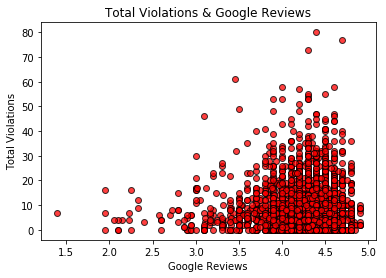

In [84]:
plt.scatter(scatter_df['Average of Ratings'],scatter_df['violation_count'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Total Violations & Google Reviews")
plt.xlabel("Google Reviews")
plt.ylabel("Total Violations")

plt.savefig("scatter.png")
plt.show()

In [30]:
data = merge_table[['Average of Ratings','violation_count','Hygienic Practices', 'Food Preperation', 
                                         'Pests & Rodents', 'Phyiscal Facilities', 'Compliance']]
correlation = round(data.corr(method='pearson'),3)
correlation

,Average of Ratings,violation_count,Hygienic Practices,Food Preperation,Pests & Rodents,Phyiscal Facilities,Compliance
Average of Ratings,1.000,0.074,0.055,0.067,0.006,0.026,0.003
violation_count,0.074,1.000,0.725,0.715,0.531,0.796,0.287
Hygienic Practices,0.055,0.725,1.000,0.479,0.317,0.474,0.169
Food Preperation,0.067,0.715,0.479,1.000,0.328,0.446,0.167
Pests & Rodents,0.006,0.531,0.317,0.328,1.000,0.450,0.174
Phyiscal Facilities,0.026,0.796,0.474,0.446,0.450,1.000,0.213
Compliance,0.003,0.287,0.169,0.167,0.174,0.213,1.000


In [44]:
high_viol = merge_table.loc[merge_table['violation_count'] >=50]
high_viol

,Data License,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,Average of Ratings,Average Number of Reviews,Total Number of Reviews,Total Returned
205,16310,0,0,2,0,1,0,0,0,0,...,10,6,1,11,8,3,4.00,349.0,698,2
630,32728,0,0,3,0,3,0,0,0,0,...,9,5,3,8,10,0,4.60,134.0,402,3
957,68637,0,0,3,0,3,0,0,0,0,...,8,6,2,6,13,0,4.20,155.0,465,3
1679,1844144,0,0,1,0,7,0,0,0,0,...,10,11,1,8,2,2,4.40,31.0,217,7
1854,1947441,0,0,3,0,3,0,0,0,0,...,9,6,1,13,12,0,4.30,414.0,1242,3
1897,1968904,0,0,3,0,3,0,0,0,0,...,4,4,0,15,15,0,3.90,547.0,1094,2
2085,2037284,2,3,3,0,3,0,0,0,0,...,6,9,4,9,9,0,4.90,56.0,168,3
2193,2069042,1,1,4,0,4,0,0,0,1,...,9,2,3,11,11,2,4.20,142.0,710,5
2902,2229533,0,0,3,0,3,0,0,0,1,...,4,7,4,10,18,1,4.50,904.0,904,1
2967,2252227,0,0,3,0,3,0,0,0,0,...,3,3,3,6,26,0,4.40,74.0,74,1


In [57]:
low_viol = merge_table.loc[merge_table['violation_count'] <=10]
low_viol.head()

,Data License,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,Average of Ratings,Average Number of Reviews,Total Number of Reviews,Total Returned
4,429,0,0,1,0,1,0,0,0,0,...,1,2,0,2,1,0,4.80,364.00,364,1
6,691,0,0,0,0,1,0,0,0,0,...,2,2,0,1,1,0,2.67,48.67,146,3
7,692,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.00,73.00,73,1
8,783,0,0,1,0,1,0,0,0,0,...,1,0,0,1,3,0,4.50,109.00,218,2
9,800,0,0,1,0,1,0,0,0,0,...,1,1,0,1,0,0,4.40,196.00,392,2


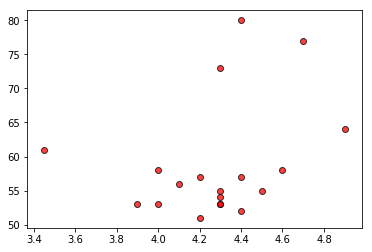

In [46]:
plt.scatter(high_viol['Average of Ratings'],high_viol['violation_count'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

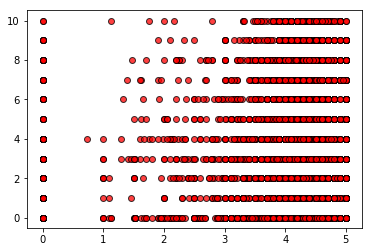

In [47]:
plt.scatter(low_viol['Average of Ratings'],low_viol['violation_count'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

In [48]:
pie_high_df = pd.DataFrame(high_viol,columns=['Management', 'Hygienic Practices', 'Food Preperation', 
                                         'Pests & Rodents', 'Phyiscal Facilities', 'Compliance'])
pie_high_df.head()

,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Phyiscal Facilities,Compliance
205,8,10,6,1,8,3
630,8,9,5,3,10,0
957,9,8,6,2,13,0
1679,16,10,11,1,2,2
1854,7,9,6,1,12,0


In [49]:
pie_low_df = pd.DataFrame(low_viol,columns=['Management', 'Hygienic Practices', 'Food Preperation', 
                                         'Pests & Rodents', 'Phyiscal Facilities', 'Compliance'])
pie_low_df.head()

,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Phyiscal Facilities,Compliance
4,3,1,2,0,1,0
6,1,2,2,0,1,0
7,0,0,0,0,0,0
8,3,1,0,0,3,0
9,3,1,1,0,0,0


In [50]:
pie_all_df = pd.DataFrame(merge_table,columns=['Management', 'Hygienic Practices', 'Food Preperation', 
                                         'Pests & Rodents', 'Phyiscal Facilities', 'Compliance'])
pie_all_df.head()

,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Phyiscal Facilities,Compliance
0,5,5,1,1,4,0
1,3,0,2,0,3,2
2,3,2,1,0,3,0
3,6,2,1,0,4,0
4,3,1,2,0,1,0


In [51]:
all_violations = pie_all_df.sum()
top_violations = pie_high_df.sum()
low_violations = pie_low_df.sum()

In [72]:
low_count = low_violations.sum()
high_count = top_violations.sum()
all_count =  all_violations.sum()

In [82]:
# breakdown of violation types
all_breakdown = round(all_violations/all_count,2)*100
high_breakdown = round(top_violations/high_count,2)*100
low_breakdown = round(low_violations/low_count,2)*100

variation = high_breakdown - low_breakdown 

breakdown_df = pd.DataFrame({"All Violations": all_breakdown, "High Violations": high_breakdown, 
                             "Low Violations": low_breakdown, "Difference": variation })

breakdown_df['All Violations'] = breakdown_df['All Violations'].map("{:.0f}%".format) 
breakdown_df['High Violations'] = breakdown_df['High Violations'].map("{:.0f}%".format) 
breakdown_df['Low Violations'] = breakdown_df['Low Violations'].map("{:.0f}%".format)
breakdown_df['Difference'] = breakdown_df['Difference'].map("{:.0f}%".format)


breakdown_df

,All Violations,High Violations,Low Violations,Difference
Management,27%,21%,28%,-7%
Hygienic Practices,19%,18%,21%,-3%
Food Preperation,13%,16%,11%,5%
Pests & Rodents,4%,7%,3%,4%
Phyiscal Facilities,35%,36%,36%,0%
Compliance,2%,2%,1%,1%


In [53]:
labels = ['Management', 'Hygienic Practices', 'Food Preperation', 'Pests & Rodents', 'Phyiscal Facilities', 'Compliance']

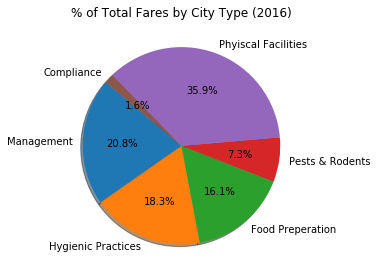

In [54]:
plt.pie(top_violations, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type (2016)")
plt.tight_layout()

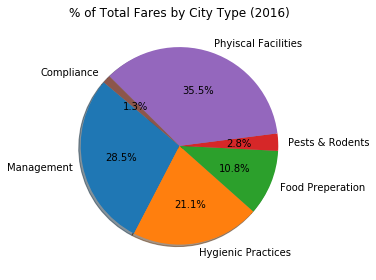

In [55]:
plt.pie(low_violations, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type (2016)")
plt.tight_layout()

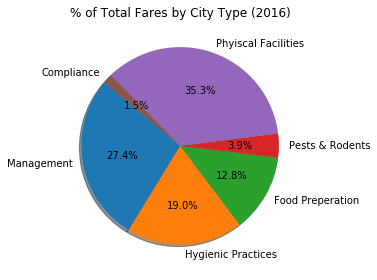

In [56]:
plt.pie(all_violations, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type (2016)")
plt.tight_layout()